In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from gurobipy import *
from itertools import combinations

## Importing the dataset

4460

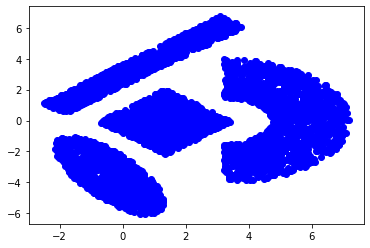

In [2]:
with open("ShapedData.csv") as file_name:
    array=np.loadtxt(file_name, delimiter=",")
plt.scatter(array[:,0], array[:,1], color='b', label ='Given data')
len(array)

## Locating k centers through greedy k-centers algorithm

In [3]:
m=list(random.sample(list(array),1))

In [4]:
m

[array([5.9688, 2.4454])]

In [5]:
def Cluster(m,k):
    D=[] #Distance from any point i to the nearest mean
    A={i:[] for i in range(k)} #Dictionary containing points belonging to ith cluster
    for i in range(len(array)):
        mini=[]
        for j in range(len(m)):
            mini.append(np.linalg.norm(m[j]-array[i])**2)
#             print(mini)
        D.append(min(mini))
        A[mini.index(min(mini))].append(list(array[i]))
    Obj=np.average(D)
    return Obj, A, D

In [6]:
k=0
n_clusters = 4
while k<n_clusters:
    k=k+1
    Obj,A, D=Cluster(m,k)
    m.append(array[D.index(max(D))])

## Cluster centers and cluster color coding after greedy k-centers

In [7]:
CC=[0]*n_clusters #Cluster centers
print("Cluster centers are:")
for i in range(n_clusters):
    CC[i]=(m[i])
    print(CC[i])

Cluster centers are:
[5.9688 2.4454]
[-0.11754 -5.6056 ]
[-1.6747  1.9376]
[ 5.1791 -3.2861]


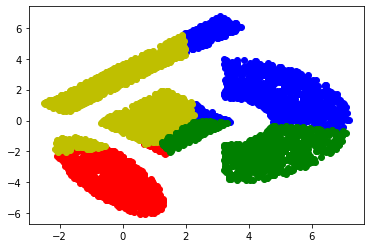

In [8]:
c=['b','r','y','g','c']
for i in range(n_clusters):
    for j in range(len(A[i])): 
        plt.scatter(A[i][j][0], A[i][j][1], color=c[i])

## Function to compute objective

In [9]:
#Computing objective
def Obj(CC, A):
    D=[]
    for i in range(len(array)):
            mini=[]
            for j in range(len(CC)):
                mini.append(np.linalg.norm(CC[j]-array[i])**2)
    #             print(mini)
            D.append(min(mini))
            A[mini.index(min(mini))].append(list(array[i]))
    Objective=np.average(D)
    return Objective

## Objective value of k-centers

In [10]:
x=Obj(CC, A)
x

7.745998111815013

In [11]:
CC

[array([5.9688, 2.4454]),
 array([-0.11754, -5.6056 ]),
 array([-1.6747,  1.9376]),
 array([ 5.1791, -3.2861])]

## Function to compute two nearest centers

In [12]:
def Closest_medians(CC):
    global index_m1
    closest_medians={}
    
    for i,j in combinations(range(len(CC)),2):
        closest_medians[i,j]=(np.linalg.norm(CC[i]-CC[j]))

    x=list(closest_medians.keys())[list(closest_medians.values()).index(min(closest_medians.values()))]

    m1=list(random.sample([CC[x[0]],CC[x[1]]],1))
    
    for i in range(len(CC)):
        if (m1==CC[i])[0][0]:
            index_m1=i
    
    return m1, index_m1

## Function to determine the farthest cluster

In [13]:
def FarCluster(index_m1, m1, A):
    
    Distances={}
    for i in A:
        if i!=index_m1:
            Distances[i]=0
            for j in range(len(A[i])):
                Distances[i]+=(np.linalg.norm(np.array(A[i][j])-m1)**2)

    Far_cluster_index=list(Distances.keys())[list(Distances.values()).index(max(Distances.values()))]
    return Far_cluster_index

## Function to swap centers


In [14]:
def SwapCenter(CC, index_m1,AFCI, j):
    
    CC_Copy=CC.copy()
    
    CC_Copy = np.array(CC_Copy)
    
    CC_Copy=np.delete(CC_Copy, index_m1, axis=0)
    
    CC_Copy = np.append(CC_Copy, [np.array(AFCI[j])] , axis=0)    
    
    Obj1, A, D = Cluster(CC_Copy,(len(CC_Copy)))

    return Obj1, CC_Copy, A

## Calling the previous functions and swapping if reduction in objective value

In [15]:
check=0

count = 0

while check==0:
    
    what=0
    
    Objective = Obj(CC, A)

    m1, index_m1 = Closest_medians(CC)

    Far_cluster_index = FarCluster(index_m1, m1, A)

    for j in range(len(A[Far_cluster_index])):

        Obj1, CC_new, A_new = SwapCenter(CC, index_m1, A[Far_cluster_index], j)

        if Obj1<Objective:
            CC = CC_new
            what = 1
            count+=1
            A=A_new
            break
    
    if what!=1:
        check=1

## Objective value after swapping

In [16]:
x=Obj(CC,A)
x

6.981778464116763

In [17]:
CC

array([[ 5.9688 ,  2.4454 ],
       [-0.11754, -5.6056 ],
       [-1.6747 ,  1.9376 ],
       [ 5.013  , -1.9469 ]])

## Number of swaps

In [18]:
count

2

## Plotting the re-clustered data

In [ ]:
c=['b','r','y','g','c']
for i in range(n_clusters):
    for j in range(len(A[i])): 
        plt.scatter(A[i][j][0], A[i][j][1], color=c[i])

KeyboardInterrupt: 